In [1]:
from model.net import naive_net
from model.data_loader import fetch_dataloader
import matplotlib.pyplot as plt
import numpy as np
import torch
from utils import plot_mask, Params

In [2]:
params = Params('experiments/base_model/params.json')

In [3]:
params.cuda = True

In [4]:
dt = fetch_dataloader(['val'], 'data', params)

In [5]:
dti = iter(dt['val'])

In [6]:
img, mask = next(dti)

In [7]:
img.shape, mask.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 1, 224, 224]))

In [8]:
model = naive_net(fresh=False)
state_dict = torch.load('checkpoint/model-4.pth')
model.load_state_dict(state_dict)

In [9]:
model.eval()
with torch.no_grad():
    out = model(img)

In [10]:
imgnpy = img.data.numpy()
masknpy_t = mask.data.numpy()
masknpy_p = out.data.numpy()

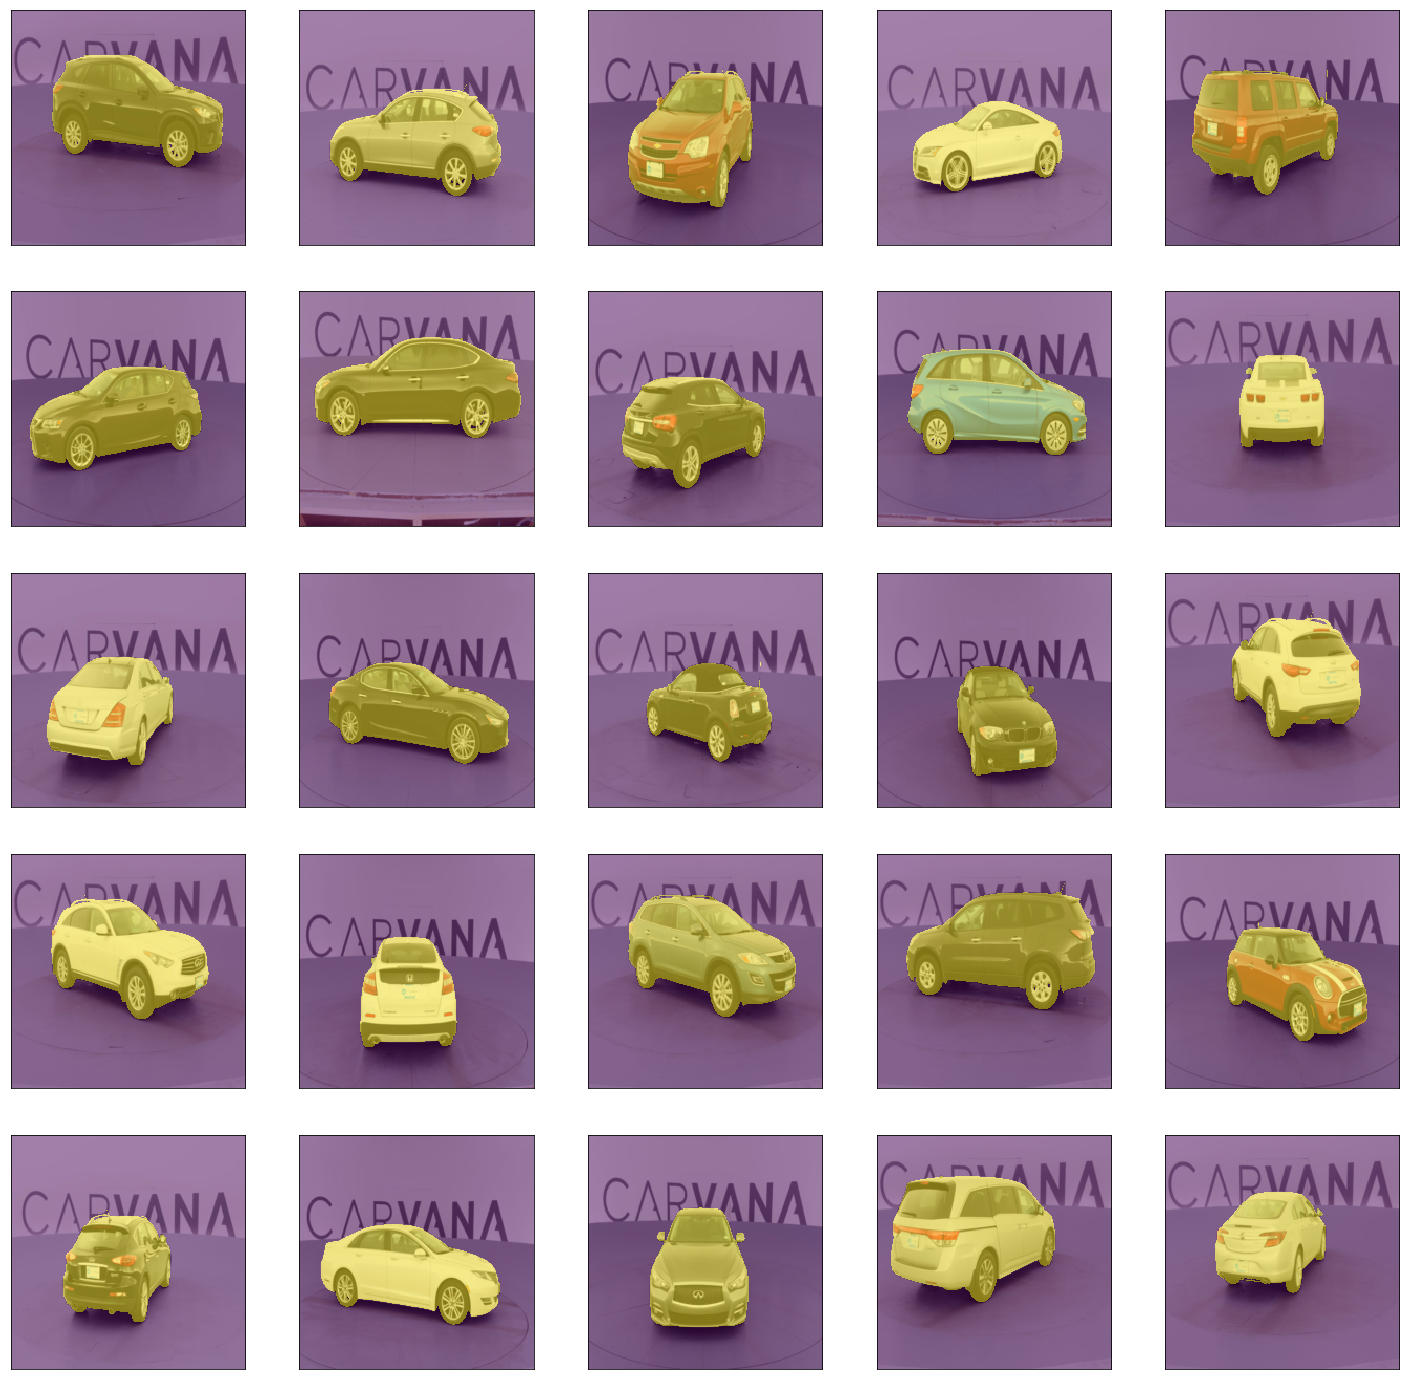

In [11]:
plot_mask(imgnpy, masknpy_t, nb_img=5, figsize=(25, 25))

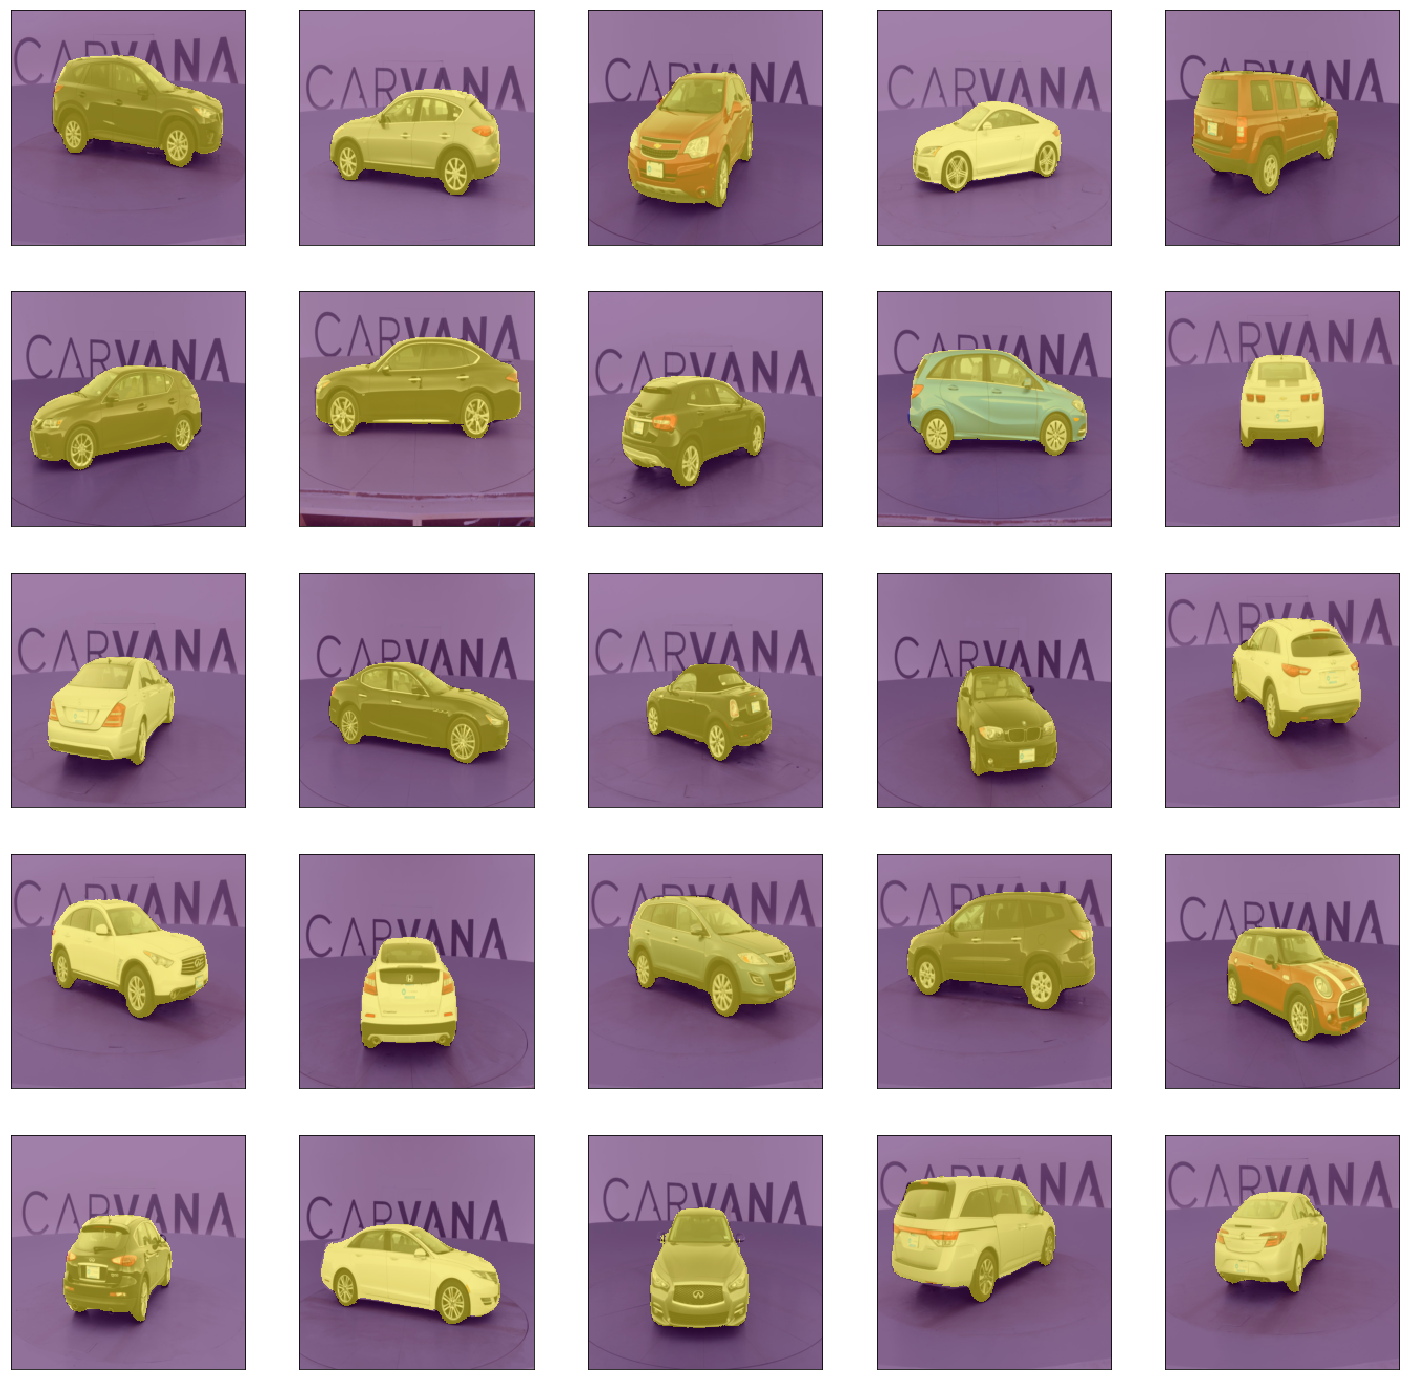

In [12]:
plot_mask(imgnpy, (masknpy_p>0).astype(np.float32), nb_img=5, figsize=(25, 25))

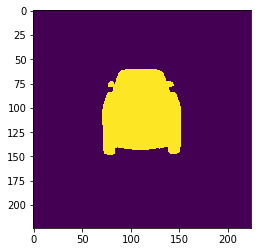

In [17]:
plt.imshow((masknpy_t[9][0]>0).astype(np.float32))

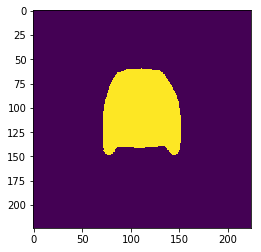

In [18]:
plt.imshow((masknpy_p[9][0]>0).astype(np.float32))

In [11]:
from PIL import Image

In [12]:
img = Image.open('data/train_masks/00087a6bd4dc_01_mask.gif')

In [16]:
imgnpy = np.array(img)

In [17]:
imgnpy.max(), imgnpy.min()

(1, 0)

In [18]:
imgnpy.dtype

dtype('uint8')

In [21]:
from torchvision import transforms

In [22]:
# loader for evaluation, no horizontal flip
eval_transformer = transforms.Compose([
    # resize the image to 64x64 (remove if images are already 64x64)
    transforms.Resize((224, 224)),
    transforms.ToTensor()])  # transform it into a torch tensor

In [24]:
mask = Image.open('data/train_masks/00087a6bd4dc_01_mask.gif')
img = Image.open('data/train/00087a6bd4dc_01.jpg')

In [26]:
img_tfm = eval_transformer(img)
mask_tfm = eval_transformer(mask)

In [29]:
img_tfm.max(), img_tfm.min()

(tensor(0.9843), tensor(0.0275))

In [32]:
mask_tfm.max(), mask_tfm.min()

(tensor(0.0039), tensor(0.))

In [45]:
mask2 = mask.convert('1')

In [46]:
mask2_tfm = eval_transformer(mask2)

In [47]:
mask2_tfm.max(), mask2_tfm.min()

(tensor(1.), tensor(0.))

In [48]:
mask2_tfm.shape

torch.Size([1, 224, 224])

In [50]:
imgnpy_tfm = img_tfm.numpy()
masknpy_tfm = mask2_tfm.numpy()

In [51]:
imgnpy_tfm.shape, masknpy_tfm.shape

((3, 224, 224), (1, 224, 224))

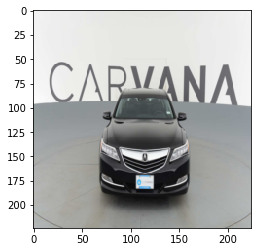

In [57]:
plt.imshow(np.transpose(imgnpy_tfm, (1,2,0)))

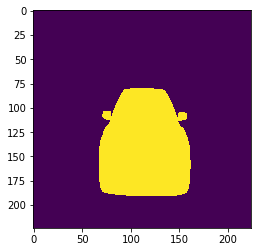

In [58]:
plt.imshow(masknpy_tfm[0])

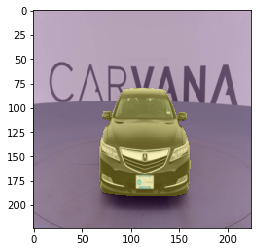

In [59]:
plt.imshow(np.transpose(imgnpy_tfm, (1,2,0)))
plt.imshow(masknpy_tfm[0], alpha=0.3)